In [64]:
#data manipulation libraries
import pandas as pd
import numpy as np



In [65]:
#data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import graphviz

#model algorithm
import sklearn
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier, 
                              GradientBoostingClassifier)
import pickle


In [66]:
#read dataset as csv file
af= pd.read_csv('C:/Users/metini/Desktop/CARDIFFMET/Programming/affairs.csv')

In [67]:
print (type (af))
print (af)

<class 'pandas.core.frame.DataFrame'>
      rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0                 3  32.0          9.0       3.0          3    17           2   
1                 3  27.0         13.0       3.0          1    14           3   
2                 4  22.0          2.5       0.0          1    16           3   
3                 4  37.0         16.5       4.0          3    16           5   
4                 5  27.0          9.0       1.0          1    14           3   
...             ...   ...          ...       ...        ...   ...         ...   
6361              5  32.0         13.0       2.0          3    17           4   
6362              4  32.0         13.0       1.0          1    16           5   
6363              5  22.0          2.5       0.0          2    14           3   
6364              5  32.0          6.0       1.0          3    14           3   
6365              4  22.0          2.5       0.0          2    16      

In [68]:
#information on the data
af.info()
print(af.columns)
print(af.index)
print(af.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   int64  
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   int64  
 5   educ             6366 non-null   int64  
 6   occupation       6366 non-null   int64  
 7   occupation_husb  6366 non-null   int64  
 8   affair           6366 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 447.7 KB
Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affair'],
      dtype='object')
RangeIndex(start=0, stop=6366, step=1)
[[ 3.  32.   9.  ...  2.   5.   1. ]
 [ 3.  27.  13.  ...  3.   4.   1. ]
 [ 4.  22.   2.5 ...  3.   5.   1. ]
 ...
 [ 5.  22.   2.5 ...  3.   1.

In [69]:
#Data cleaning
#count number of null values in each column
print (af.isnull().sum())

#no null values are detected
#drop rows with null values
af = af.dropna (axis=0)

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affair             0
dtype: int64


In [70]:
#Data exploration
#shows statistics of the data
print (af.describe())


       rate_marriage          age  yrs_married     children    religious  \
count    6366.000000  6366.000000  6366.000000  6366.000000  6366.000000   
mean        4.109645    29.082862     9.009425     1.396874     2.426170   
std         0.961430     6.847882     7.280120     1.433471     0.878369   
min         1.000000    17.500000     0.500000     0.000000     1.000000   
25%         4.000000    22.000000     2.500000     0.000000     2.000000   
50%         4.000000    27.000000     6.000000     1.000000     2.000000   
75%         5.000000    32.000000    16.500000     2.000000     3.000000   
max         5.000000    42.000000    23.000000     5.500000     4.000000   

              educ   occupation  occupation_husb       affair  
count  6366.000000  6366.000000      6366.000000  6366.000000  
mean     14.209865     3.424128         3.850141     0.322495  
std       2.178003     0.942399         1.346435     0.467468  
min       9.000000     1.000000         1.000000     0.0000

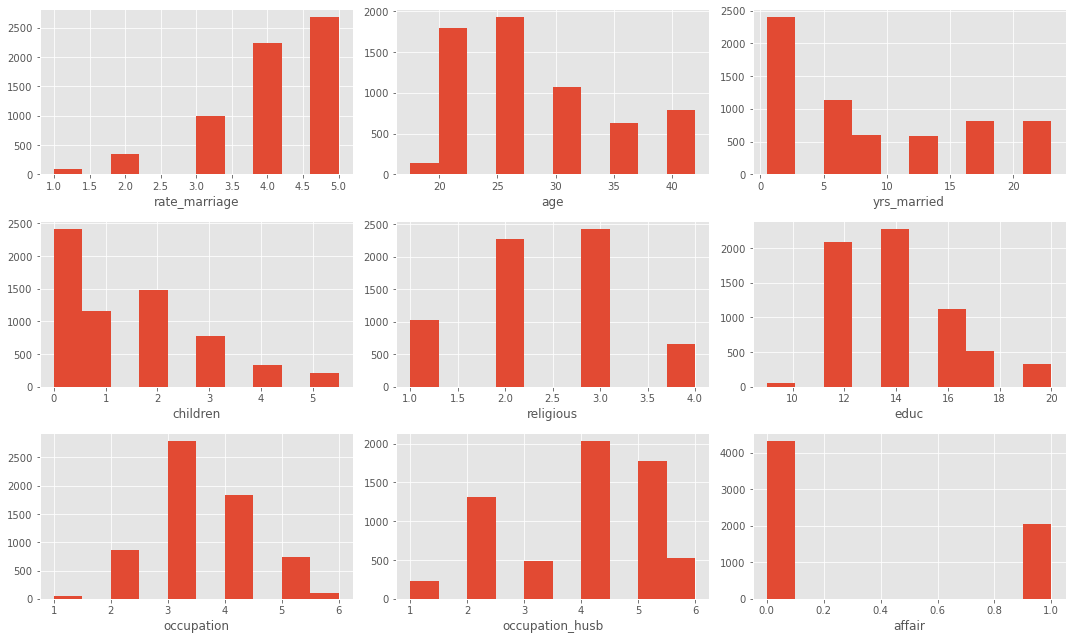

In [71]:
#Assessing the distribution of the features via histogram

plt.style.use('ggplot')
fig, axis  = plt.subplots(nrows = 3, ncols = 3, figsize = (15,9))

af0, af1, af2, af3, af4, af5, af6, af7, af8 = axis.flatten()

af0.hist(af['rate_marriage'])
af0.set_xlabel('rate_marriage')

af1.hist(af['age'])
af1.set_xlabel('age')

af2.hist(af['yrs_married'])
af2.set_xlabel('yrs_married')

af3.hist(af['children'])
af3.set_xlabel('children')

af4.hist(af['religious'])
af4.set_xlabel('religious')

af5.hist(af['educ'])
af5.set_xlabel('educ')

af6.hist(af['occupation'])
af6.set_xlabel('occupation')

af7.hist(af['occupation_husb'])
af7.set_xlabel('occupation_husb')

af8.hist(af['affair'])
af8.set_xlabel('affair')

plt.tight_layout()

<AxesSubplot:>

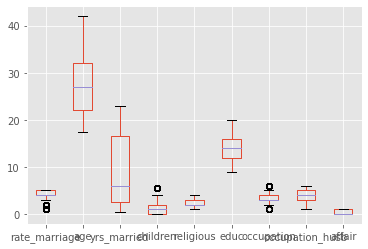

In [72]:
af.boxplot()

                 rate_marriage       age  yrs_married  children  religious  \
rate_marriage         1.000000 -0.111127    -0.128978 -0.129161   0.078794   
age                  -0.111127  1.000000     0.894082  0.673902   0.136598   
yrs_married          -0.128978  0.894082     1.000000  0.772806   0.132683   
children             -0.129161  0.673902     0.772806  1.000000   0.141845   
religious             0.078794  0.136598     0.132683  0.141845   1.000000   
educ                  0.079869  0.027960    -0.109058 -0.141918   0.032245   
occupation            0.039528  0.106127     0.041782 -0.015068   0.035746   
occupation_husb       0.027745  0.162567     0.128135  0.086660   0.004061   
affair               -0.331776  0.146519     0.203109  0.159833  -0.129299   

                     educ  occupation  occupation_husb    affair  
rate_marriage    0.079869    0.039528         0.027745 -0.331776  
age              0.027960    0.106127         0.162567  0.146519  
yrs_married     -0

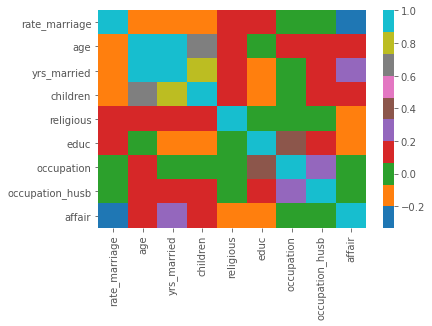

In [73]:
print (af.corr())
correlationMatrix=af.corr(method='pearson')
ag=sns.heatmap(correlationMatrix, cmap="tab10")
plt.show()


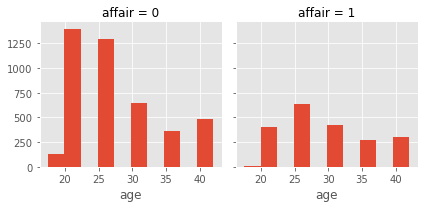

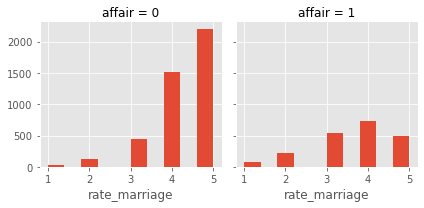

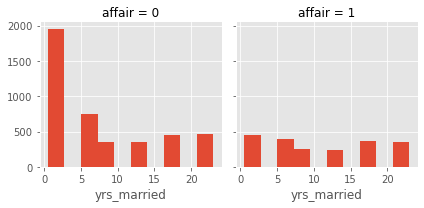

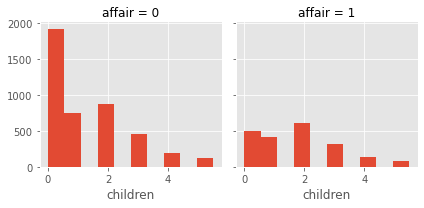

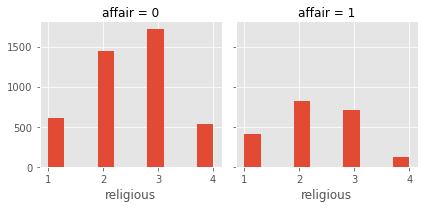

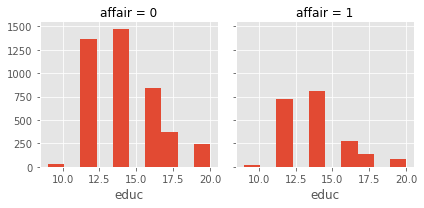

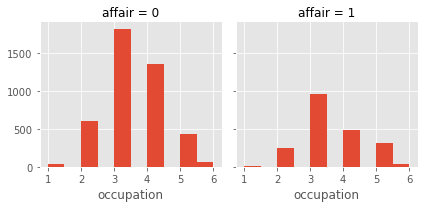

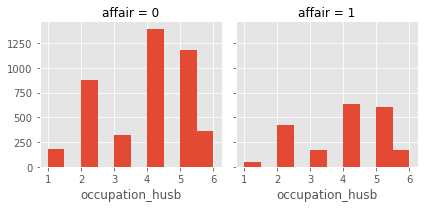

In [120]:
#exploring other features and affair
g = sns.FacetGrid(af, col = 'affair')
g.map(plt.hist, 'age')

g = sns.FacetGrid(af, col = 'affair')
g.map(plt.hist,'rate_marriage')

g = sns.FacetGrid(af, col = 'affair')
g.map(plt.hist,'yrs_married')

g = sns.FacetGrid(af, col = 'affair')
g.map(plt.hist,'children')

g = sns.FacetGrid(af, col = 'affair')
g.map(plt.hist,'religious')

g = sns.FacetGrid(af, col = 'affair')
g.map(plt.hist,'educ')

g = sns.FacetGrid(af, col = 'affair')
g.map(plt.hist,'occupation')

g = sns.FacetGrid(af, col = 'affair')
g.map(plt.hist,'occupation_husb')

In [75]:
#Feature selection
#separate dataframe for independent variables
independent_variables =['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb' ]
X = af[independent_variables]

print (type(X))
print (X)

#create series of target variable to predict
target_variable ='affair' 
y = af[target_variable]

print (type(y))
print (y)

#convert to numpy array
X_numpy = np.array(X)
y_numpy = np.array(y)

print (type(X_numpy))
print (type(y_numpy))

<class 'pandas.core.frame.DataFrame'>
      rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0                 3  32.0          9.0       3.0          3    17           2   
1                 3  27.0         13.0       3.0          1    14           3   
2                 4  22.0          2.5       0.0          1    16           3   
3                 4  37.0         16.5       4.0          3    16           5   
4                 5  27.0          9.0       1.0          1    14           3   
...             ...   ...          ...       ...        ...   ...         ...   
6361              5  32.0         13.0       2.0          3    17           4   
6362              4  32.0         13.0       1.0          1    16           5   
6363              5  22.0          2.5       0.0          2    14           3   
6364              5  32.0          6.0       1.0          3    14           3   
6365              4  22.0          2.5       0.0          2    16      

In [76]:
#Data splitting
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(
    X_numpy, y_numpy, test_size=0.20, random_state=42,)

In [77]:
#fit model no training
af_model = RandomForestClassifier(random_state=1, max_depth= 12, 
                                  max_samples=300, max_features=7, 
                                  n_estimators=5, criterion='entropy')
af_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=12, max_features=7,
                       max_samples=300, n_estimators=5, random_state=1)

In [78]:
#Random Search
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.preprocessing import StandardScaler 

#Hyperparameter Tuninig
# set different parameter values to tune

param_grid = {
    "n_estimators": [50, 100, 150, 200, 600,1000,2000],
    "n_estimators": [300, 350,400,450,500,550,600],
    "n_estimators": [4, 6,8,10, 20],
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12],
    "max_samples": [50, 100,200, 250,500,1000, 2000, 3000],
    "max_features": [1, 2, 3, 4, 5, 6, 7, 8, 9],
    "criterion": ["gini", "entropy"]
}


#rf_model = RandomForestClassifier(random_state=1, max_depth= 12, max_samples=300, max_features=7, n_estimators=num_trees)

af_model = RandomForestClassifier()

# set randomsearch
randomizedSearchCV = RandomizedSearchCV(
    estimator=af_model, param_distributions=param_grid, n_iter=5, cv=5, verbose=2, n_jobs=1,random_state=40
)

randomizedSearchCVResults = randomizedSearchCV.fit(X_train, y_train)
print(f"Best score = {randomizedSearchCVResults.best_score_}, Best Hyperparameters ={randomizedSearchCVResults.best_params_}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=10, max_samples=100, max_features=2, max_depth=10, criterion=entropy 
[CV]  n_estimators=10, max_samples=100, max_features=2, max_depth=10, criterion=entropy, total=   0.0s
[CV] n_estimators=10, max_samples=100, max_features=2, max_depth=10, criterion=entropy 
[CV]  n_estimators=10, max_samples=100, max_features=2, max_depth=10, criterion=entropy, total=   0.0s
[CV] n_estimators=10, max_samples=100, max_features=2, max_depth=10, criterion=entropy 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=10, max_samples=100, max_features=2, max_depth=10, criterion=entropy, total=   0.0s
[CV] n_estimators=10, max_samples=100, max_features=2, max_depth=10, criterion=entropy 
[CV]  n_estimators=10, max_samples=100, max_features=2, max_depth=10, criterion=entropy, total=   0.0s
[CV] n_estimators=10, max_samples=100, max_features=2, max_depth=10, criterion=entropy 
[CV]  n_estimators=10, max_samples=100, max_features=2, max_depth=10, criterion=entropy, total=   0.0s
[CV] n_estimators=6, max_samples=1000, max_features=1, max_depth=4, criterion=entropy 
[CV]  n_estimators=6, max_samples=1000, max_features=1, max_depth=4, criterion=entropy, total=   0.0s
[CV] n_estimators=6, max_samples=1000, max_features=1, max_depth=4, criterion=entropy 
[CV]  n_estimators=6, max_samples=1000, max_features=1, max_depth=4, criterion=entropy, total=   0.0s
[CV] n_estimators=6, max_samples=1000, max_features=1, max_depth=4, criterion=entropy 
[CV]  n_estimators=6, max_samples=1000, max_featur

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.0s finished


In [79]:
#Create model with best hyperparameters

#Best score = 0.7221225015472236 
#Best Hyperparameters n_estimators': 20, 'max_samples': 3000, 'max_features': 5, 'max_depth': 5,, 'criterion': 'entropy'}}

dict_best_params=randomizedSearchCVResults.best_params_
best_max_depth=dict_best_params["max_depth"]
best_max_samples=dict_best_params["max_samples"]
best_max_features=dict_best_params["max_features"]
best_n_estimators=dict_best_params["n_estimators"]
best_n_estimators=dict_best_params["n_estimators"]
best_criterion=dict_best_params["criterion"]

af_model = RandomForestClassifier(random_state=1, max_depth= 5, 
                                  max_samples=3000, 
                                  max_features=5, 
                                  n_estimators=20,
                                criterion='entropy')
#

#Fit RandomForestClassifier model
af_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=5,
                       max_samples=3000, n_estimators=20, random_state=1)

In [80]:
#save model
import pickle
pickle.dump(af_model, open("random_model.p", "wb" ))


In [107]:
#prediction of affair
print("Making predictions for the following in train set:")
predicted_values=af_model.predict(X_train[0:20,:])
true_values=y_train[0:20]
print("True values are ",true_values)
print("The predicted values are", predicted_values)
print( predicted_values==true_values)



training_accuracy=accuracy_score(true_values, predicted_values, normalize=False)
print("Accuracy Score in Training set", training_accuracy)

print("Making predictions for the following in testing set:")
predicted_values=af_model.predict(X_test[0:20,:])
true_values=y_test[0:20]
print("True values are ",true_values)
print("The predicted values are", predicted_values)
print( predicted_values==true_values)


testing_accuracy=accuracy_score(true_values, predicted_values, normalize=False)
print("Accuracy Score in Testing set", testing_accuracy)

Making predictions for the following in train set:
True values are  [1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1]
The predicted values are [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0]
[ True  True  True  True  True  True  True  True  True False False  True
  True False  True  True  True  True  True False]
Accuracy Score in Training set 16
Making predictions for the following in testing set:
True values are  [0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1]
The predicted values are [0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1]
[ True  True  True False  True  True  True False  True False  True  True
  True  True  True  True  True  True False  True]
Accuracy Score in Testing set 16


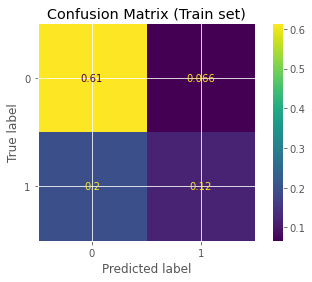

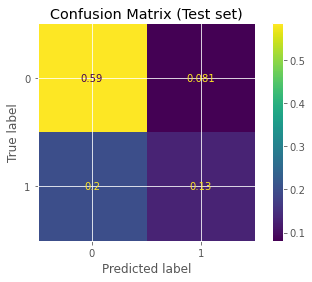

In [118]:
#confusion matrix in percentage
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#Plot the confusion matrix for training data using percentage
plot_confusion_matrix(af_model, X_train, y_train, normalize="all")
plt.title('Confusion Matrix (Train set)')
plt.show()

#Plot the confusion matrix for testing data using percentage
plot_confusion_matrix(af_model, X_test, y_test,normalize="all")
plt.title('Confusion Matrix (Test set)')
plt.show()

In [84]:
# Average training accuracy
from sklearn.metrics import accuracy_score
training_accuracy=accuracy_score(y_train, af_model.predict(X_train))
print("Average Train accuracy ", training_accuracy)

testing_accuracy=accuracy_score(y_test, af_model.predict(X_test))
print("Average Testing accuracy ", testing_accuracy)



Average Train accuracy  0.7340926944226237
Average Testing accuracy  0.716640502354788


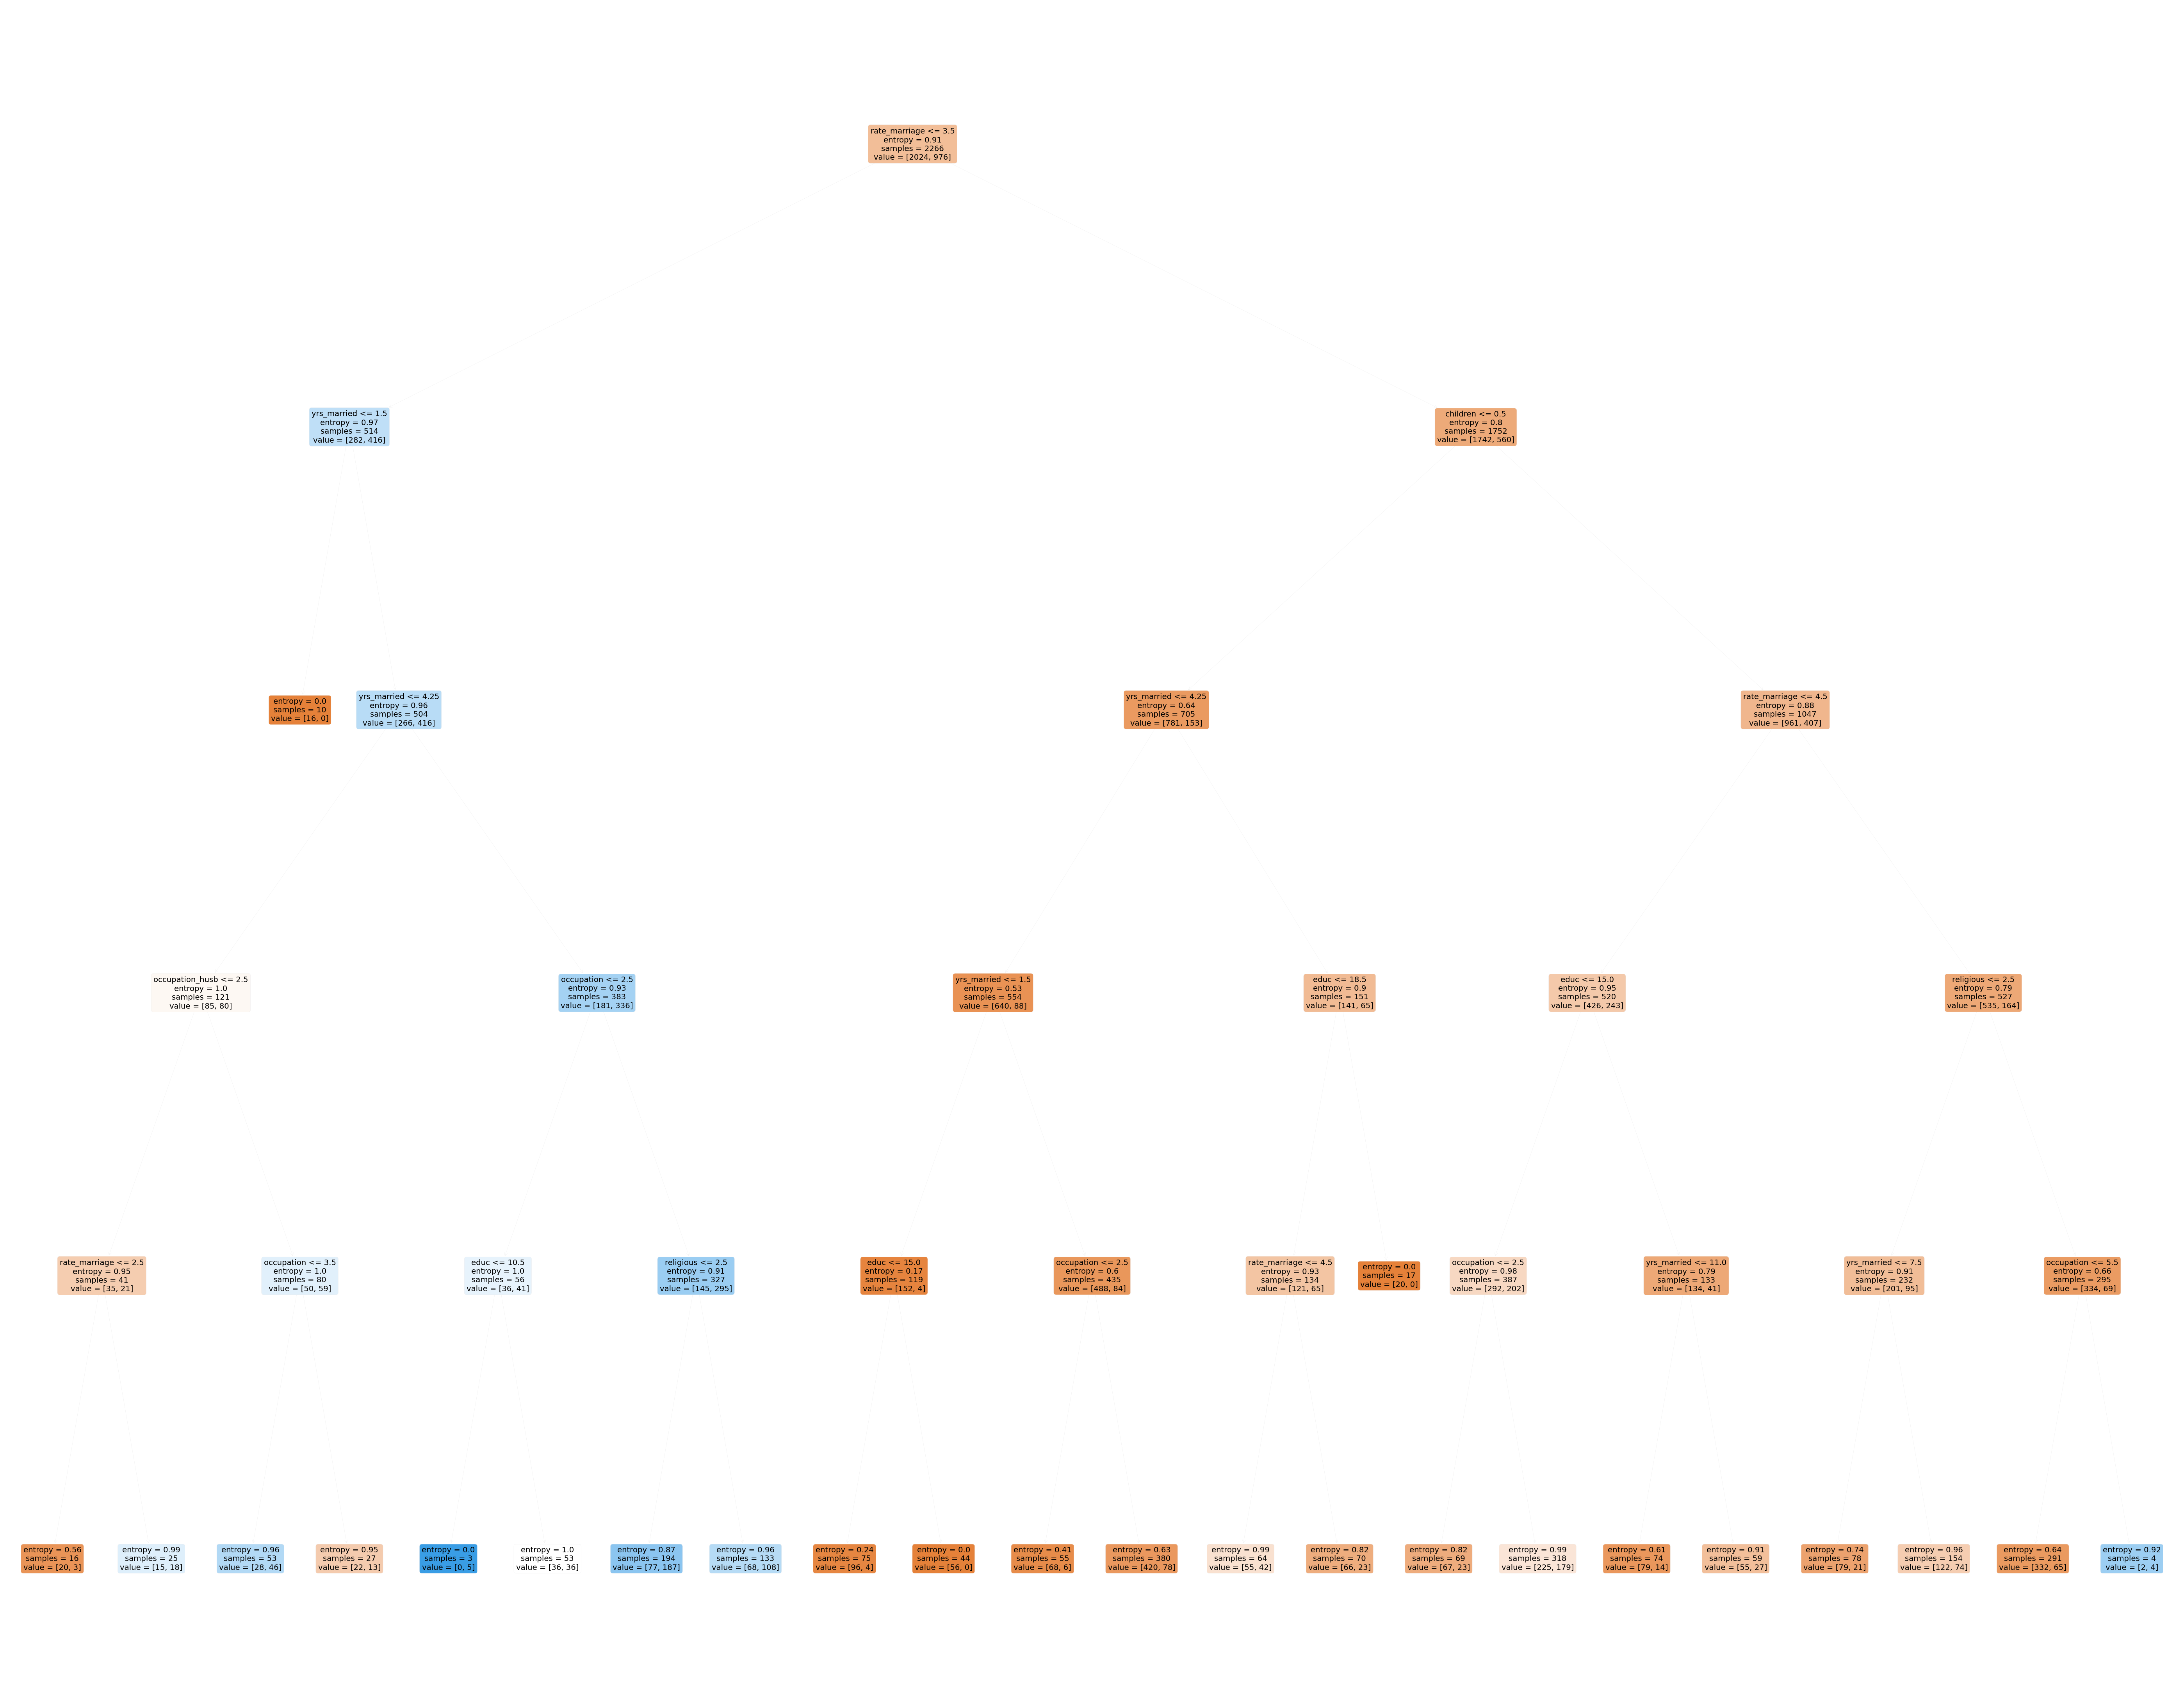

In [124]:
from sklearn import tree
fn=independent_variables
fig =plt.figure(figsize=(100,80))
dd=tree.plot_tree(af_model.estimators_[index],  feature_names = fn, 
                rounded = True, proportion = False, 
                precision = 2, filled = True)
fig.savefig("decision_tree.png") 